In [210]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as stats
import math

**Q1**

In [211]:
heights_data = pd.read_csv('../statsics_course_data_files/heights.csv')
X = heights_data.loc[:, 'HEIGHT'].values
Y = heights_data.loc[:, 'WEIGHT'].values

**A**

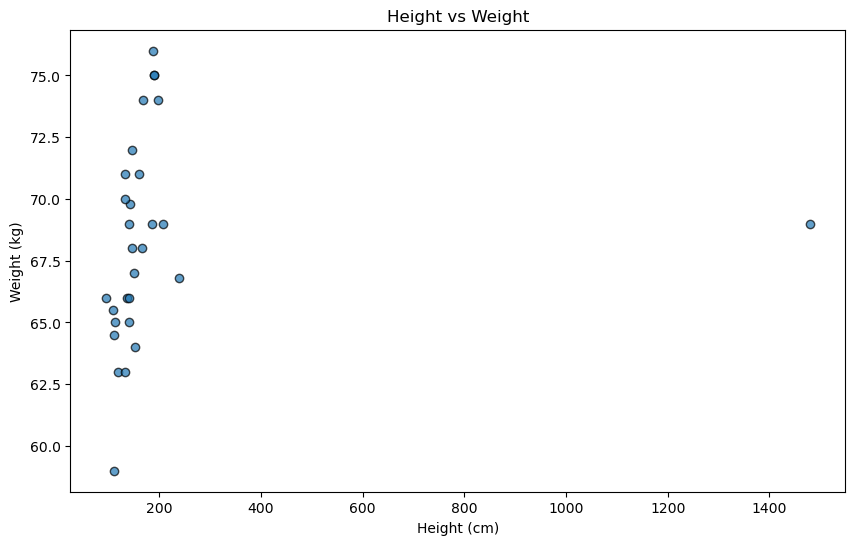

In [212]:
plt.figure(figsize=(10, 6))
plt.scatter(X, Y, alpha=0.7, edgecolors='k')
plt.xlabel('Height (cm)')
plt.ylabel('Weight (kg)')
plt.title('Height vs Weight')
plt.show()

**B**

In [213]:
def robust_linear_regression(X, Y):
    Y_h = Y[math.ceil(len(X) * 2 / 3):]
    Y_l = Y[:math.ceil(len(X) * 1 / 3)]

    b = (np.median(Y_h) - np.median(Y_l)) / (X[math.ceil(len(X) * 5 / 6)] - X[math.ceil(len(X) * 1 / 6)])
    a = np.median(Y - b * X)

    return b, a
robust_linear_regression(X, Y)

(0.08333333333333333, 55.66666666666667)

In [214]:
def least_squares_regression(X, Y):
        X_mean = np.mean(X)
        Y_mean = np.mean(Y)

        # Calculate the slope (b) and intercept (a) using least squares method
        b = (np.sum((X - X_mean) * (Y - Y_mean))) / (np.sum((X - X_mean)**2))
        a = Y_mean - b * X_mean

        return b, a
least_squares_regression(X, Y)

(0.0018456444858739314, 67.93289611750745)

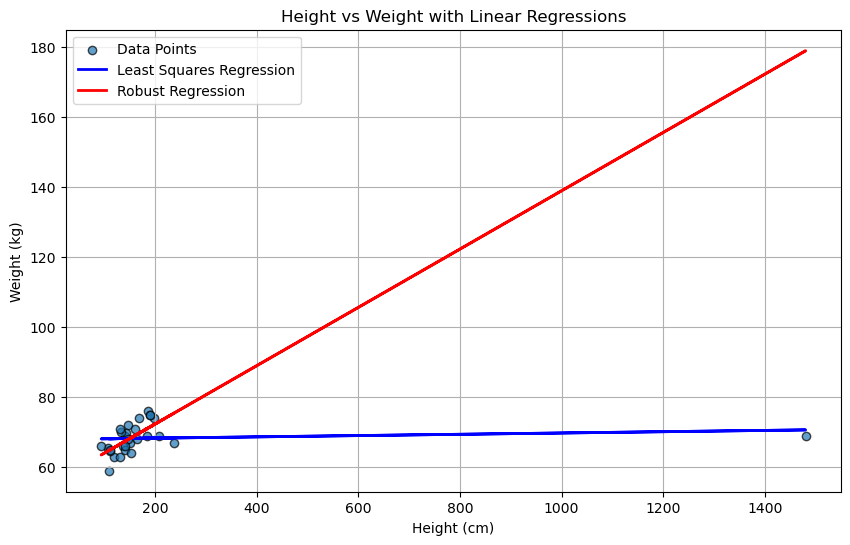

In [215]:
plt.figure(figsize=(10, 6))
b, a = least_squares_regression(X, Y)
c, d = robust_linear_regression(X, Y)
plt.scatter(X, Y, alpha=0.7, edgecolors='k')
plt.plot(X, b * X + a, color='blue', linewidth=2)
plt.plot(X, c * X + d, color='red', linewidth=2)
plt.legend(['Data Points', 'Least Squares Regression', 'Robust Regression'])
plt.grid()
plt.xlabel('Height (cm)')
plt.ylabel('Weight (kg)')
plt.title('Height vs Weight with Linear Regressions')
plt.show()

**D**

In [216]:
def variance(X):
    return (np.sum((X - np.mean(X))** 2) / len(X))

def covariance(X, Y):
    return np.sum((X - np.mean(X)) * (Y - np.mean(Y))) / len(X)

def correlation(X, Y):
    num = covariance(X, Y)
    vx= variance(X)
    vy= variance(Y)
    denom = math.sqrt(variance(X) * variance(Y))
    return num / denom
    #return covariance(X, Y) / math.sqrt(variance(X) * variance(Y))

def R2(X, Y):
    b, a = least_squares_regression(X, Y)
    return (1 - np.sum((Y - (b * X + a))**2) / np.sum((Y - np.mean(Y))**2))

In [217]:
b, a = least_squares_regression(X, Y)
print('slope:', b)
print('correlation:', correlation(X, Y))
print('correlation calculated using linear regression slope:', b * math.sqrt(variance(X) / variance(Y)))
print('R2:', R2(X, Y))
print('R2 calculated with r^2:', correlation(X, Y)**2)

slope: 0.0018456444858739314
correlation: 0.11163594809565446
correlation calculated using linear regression slope: 0.11163594809565446
R2: 0.012462584907215302
R2 calculated with r^2: 0.012462584907215656


**E**

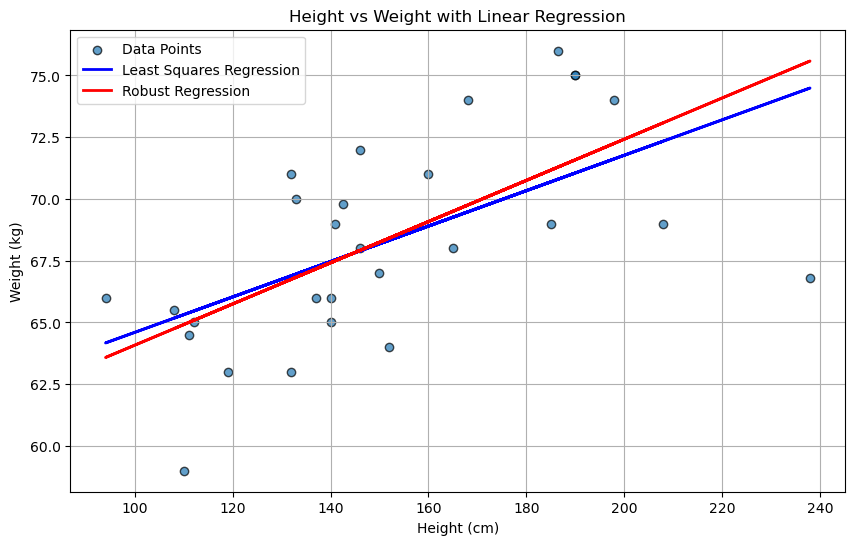

slope: 0.07165444334473373
correlation: 0.5857442860266672
correlation calculated using linear regression slope: 0.5857442860266673
R2: 0.3430963686128905
R2 calculated with r^2: 0.34309636861289006


In [218]:
# Remove the outlier
new_Y = np.delete(Y, np.argmax(X))
new_X = np.delete(X, np.argmax(X))

# second time B
plt.figure(figsize=(10, 6))
b, a = least_squares_regression(new_X, new_Y)
c, d = robust_linear_regression(new_X, new_Y)
plt.scatter(new_X, new_Y, alpha=0.7, edgecolors='k')
plt.plot(new_X, b * new_X + a, color='blue', linewidth=2)
plt.plot(new_X, c * new_X + d, color='red', linewidth=2)
plt.legend(['Data Points', 'Least Squares Regression', 'Robust Regression'])
plt.grid()
plt.xlabel('Height (cm)')
plt.ylabel('Weight (kg)')
plt.title('Height vs Weight with Linear Regression')
plt.show()

# second time D
print('slope:', b)
print('correlation:', correlation(new_X, new_Y))
print('correlation calculated using linear regression slope:', b * math.sqrt(variance(new_X) / variance(new_Y)))
print('R2:', R2(new_X, new_Y))
print('R2 calculated with r^2:', correlation(new_X, new_Y)**2)


**Q2**

In [219]:
data = pd.read_csv('../statsics_course_data_files/Age_And_Time.csv')
X2 = data.loc[:, 'Age'].values
Y2 = data.loc[:, 'Time'].values

**A**

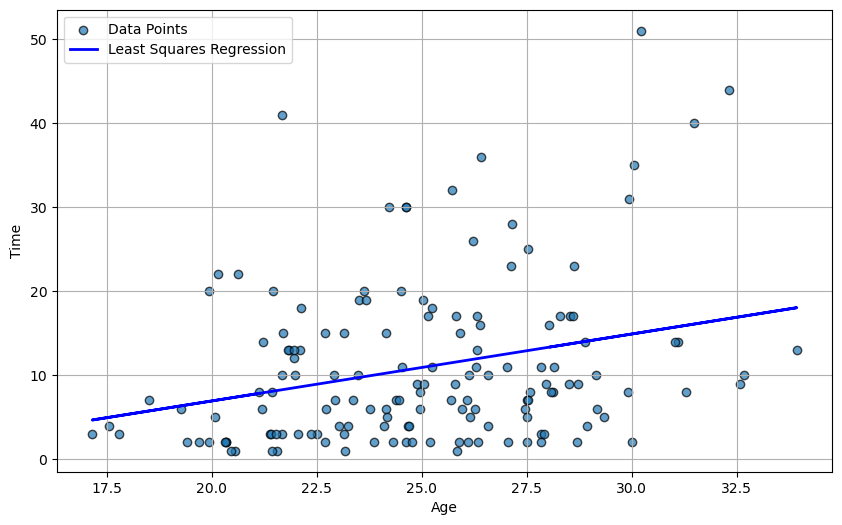

R2: 0.07896074430014045


In [220]:
b, a = least_squares_regression(X2, Y2)
plt.figure(figsize=(10, 6))
plt.scatter(X2, Y2, alpha=0.7, edgecolors='k')
plt.plot(X2, b * X2 + a, color='blue', linewidth=2)
plt.legend(['Data Points', 'Least Squares Regression'])
plt.grid()
plt.xlabel('Age')
plt.ylabel('Time')
plt.show()
print('R2:', correlation(X2, Y2)**2)

**B**

**Q3**

**A**

In [235]:
X3 = stats.norm.rvs(size=30, loc = 5, scale = 1)

**B**

In [236]:
Y3 = (5 * X3) + 2

**C**

In [237]:
print('Correlation:', correlation(X3, Y3))

Correlation: 1.0000000000000002


**D**

In [238]:
b, a = least_squares_regression(X3, Y3)
print('Slope:', b)

Slope: 5.000000000000001


**E**

In [239]:
noise = stats.norm.rvs(size=30, loc = 0, scale = 1)
Y3_with_noise = Y3 + noise
print('Correlation:', correlation(X3, Y3_with_noise))
b, a = least_squares_regression(X3, Y3_with_noise)
print('Slope:', b)

Correlation: 0.9690751395043145
Slope: 4.981775449447265


**F**

In [251]:
r_values = []
b_values = []
noise_std = np.array(range(5, 101)) / 10
for i in noise_std:
    noise = stats.norm.rvs(size=30, loc = 0, scale = i)
    Y3_with_noise = Y3 + noise
    r_values.append(correlation(X3, Y3_with_noise))
    b, a = least_squares_regression(X3, Y3_with_noise)
    b_values.append(b)


**G**

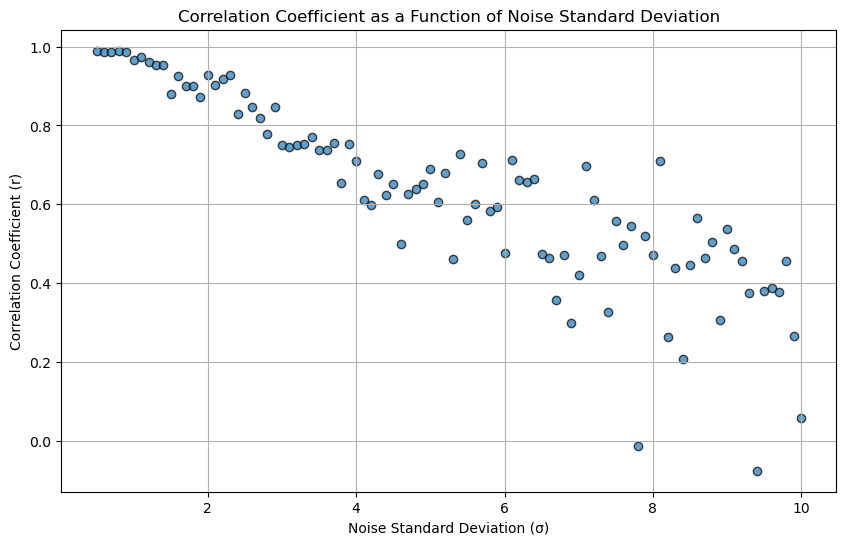

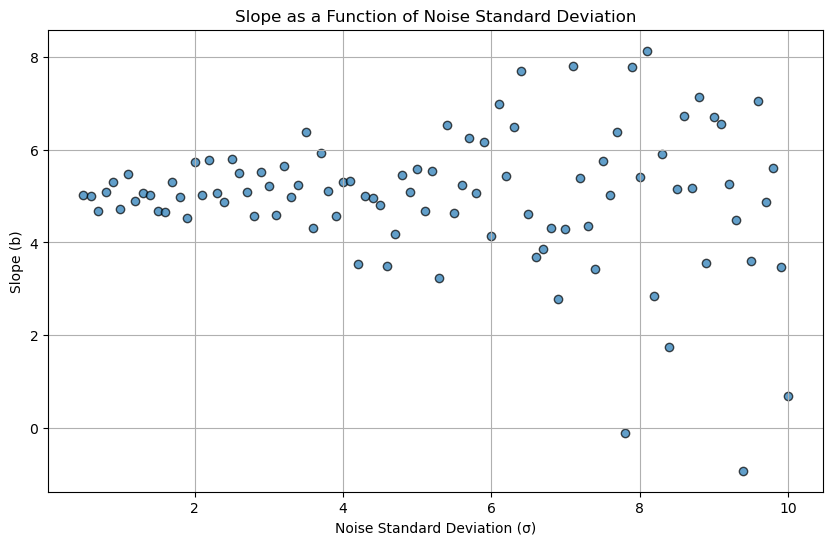

In [252]:
plt.figure(figsize=(10, 6))
plt.scatter(noise_std, r_values, alpha=0.7, edgecolors='k')
plt.xlabel('Noise Standard Deviation (σ)')
plt.ylabel('Correlation Coefficient (r)')
plt.title('Correlation Coefficient as a Function of Noise Standard Deviation')
plt.grid()
plt.show()
plt.figure(figsize=(10, 6))
plt.scatter(noise_std, b_values, alpha=0.7, edgecolors='k')
plt.xlabel('Noise Standard Deviation (σ)')
plt.ylabel('Slope (b)')
plt.title('Slope as a Function of Noise Standard Deviation')
plt.grid()
plt.show()

**Q4**